<a href="https://colab.research.google.com/github/KushanChamindu/Filtering_and_Noise_removal/blob/main/Noise_filtering_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path ='/content/drive/MyDrive/Semester 7/Computer vision/images/image_1/'

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys
import glob
import numpy

image_files = glob.glob(image_path+ "*.jpg")
image_list = []
for image_name in image_files:
  img = cv.imread(cv.samples.findFile(image_name))
  if img is None:
    sys.exit("Could not read the image.")
  mean_output = denoise(img.tolist(),"Mean", 3)
  median_output = denoise(img.tolist(),"Median", 3)
  mid_point_output = denoise(img.tolist(),"Mid point", 3)
  cv.imwrite (image_path+ image_name+ "Mean_n3.jpg", numpy.array(mean_output))
  cv.imwrite (image_path+ image_name+ "Median_n3.jpg", numpy.array(median_output))
  cv.imwrite (image_path+ image_name+ "Mid_point_n3.jpg", numpy.array(mid_point_output))

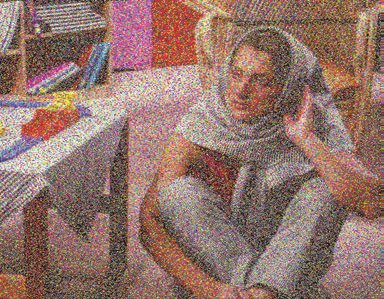

In [ ]:
cv2_imshow(image_list[5])

In [ ]:
print(len(image_list[3][0][0]))

3


In [ ]:
def denoise(image, METHOD,kernal_size=3):
  # METHOD = "Mean"
  # kernal_size=len(filter)
  filter=[]
  for i in range(kernal_size):
    filter.append([1]*kernal_size)
  image_copy = image.copy()
  #### Wrap the image for filtering
  for k in range(len(image)):
    for i in range(kernal_size//2):
      image_copy[k].insert(0,image[k][-1-(i*2)])
      image_copy[k].append(image[k][1+(i*2)])
  for i in range(kernal_size//2):
    image_copy.insert(0,image[-1-i].copy())
    image_copy.append(image[i].copy())
  
  image_x = len(image_copy)
  image_y = len(image_copy[0])
  result=[]
  image_middle = kernal_size//2
  for x in range(image_middle, image_x - image_middle):
    temp = []
    for y in range(image_middle, image_y - image_middle):
      filter_mulitplied=[]
      for i in range(len(filter)):
        RGB_tmp1=[]
        for j in range(len(filter)):
          xn = x + i - image_middle
          yn = y + j - image_middle
          RGB_tmp1.append([rgb_values *filter[i][j]  for rgb_values in image_copy[xn][yn]])
        filter_mulitplied.append(RGB_tmp1)
      if METHOD == "Mean":
        r=0
        g=0
        b=0
        for pixel_row in zip(*filter_mulitplied):
          for pixel in pixel_row:
            r+=pixel[0]
            g+=pixel[1]
            b+=pixel[2]
        RGB_final = [round(r/(kernal_size**2)), round(g/(kernal_size**2)),round(b/(kernal_size**2))]
      if METHOD == "Median":
        r=[]
        g=[]
        b=[]
        for pixel_row in zip(*filter_mulitplied):
          for pixel in pixel_row:
            r.append(pixel[0])
            g.append(pixel[1])
            b.append(pixel[2])
        r.sort()
        g.sort()
        b.sort()
        RGB_final = [r[len(r)//2], g[len(g)//2], b[len(b)//2]]
      if METHOD == "Mid point":
        r=[]
        g=[]
        b=[]
        for pixel_row in zip(*filter_mulitplied):
          for pixel in pixel_row:
            r.append(pixel[0])
            g.append(pixel[1])
            b.append(pixel[2])
        r.sort()
        g.sort()
        b.sort()
        RGB_final = [round((r[0]+r[-1])/2), round((g[0]+g[-1])/2), round((b[0]+b[-1])/2)]
      temp.append(RGB_final)
    result.append(temp)
  # for i in image_copy:print(i)
  return result
# mean_filter_denoise(image,filter)

In [ ]:
mask_array = [[1,1,1],
              [1,1,1],
              [1,1,1]]

B = [[[1, 0, 1], [2, 1, 1], [3, 1, 1]],
    [[4, 7, 8], [5, 1, 1], [6, 1, 1]],
    [[7, 1, 0], [8, 0, 0], [9, 0, 0]]]
E = [[[8, 0, 1], [2, 1, 1], [3, 1, 1], [1, 0, 1], [2, 1, 1], [3, 1, 1]],
    [[4, 100, 8], [5, 6, 1], [6, 8, 1], [1, 0, 1], [2, 1, 1], [3, 1, 1]],
    [[7, 1, 0], [8, 0, 4], [9, 0, 9], [1, 0, 1], [2, 101, 1], [3, 1, 1]],
    [[4, 100, 8], [5, 6, 1], [6, 8, 1], [1, 10, 1], [2, 1, 1], [252, 1, 1]],
    [[7, 1, 0], [8, 0, 4], [9, 0, 9], [1, 0, 1], [2, 1, 1], [3, 1, 1]],
     [[7, 1, 0], [8, 0, 4], [9, 0, 9], [1, 0, 1], [2, 1, 1], [3, 1, 1]]
     ]
for element in denoise(B,"Mid point",3): print(element)

[[5, 4, 4], [5, 4, 4], [5, 4, 4]]
[[5, 4, 4], [5, 4, 4], [5, 4, 4]]
[[5, 4, 4], [5, 4, 4], [5, 4, 4]]


In [ ]:
# mask_array = [[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,1,0,0,0,0],[0,0,1,0,0,0,0],[0,0,1,0,0,0,0],[0,0,1,0,0,0,0]]
image_output=denoise(image_list[1].tolist(),"Median",3)

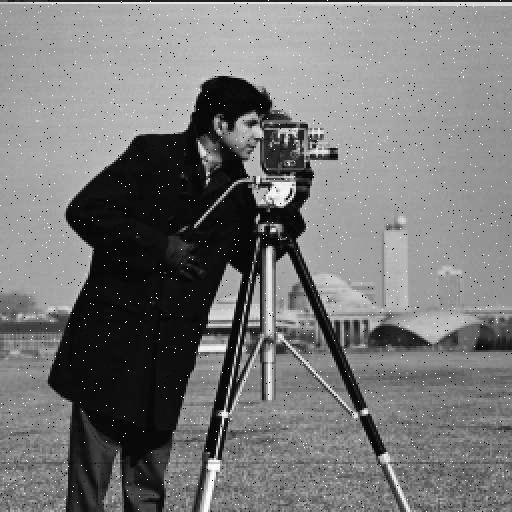

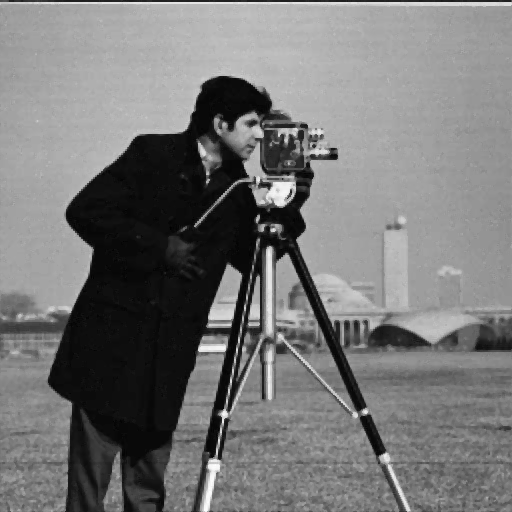

In [ ]:
import numpy
cv2_imshow(image_list[1])
cv2_imshow(numpy.array(image_output))